# Read in and plot the Mars InSight Seismic Data

Mars InSight Seismic Data: This NASA PDS repository, hosted by the PDS Geosciences Node, contains continuous waveform data for the mission.

Continuous Waveform data analysis<br>
https://pds-geosciences.wustl.edu/insight/urn-nasa-pds-insight_seis/data/xb/continuous_waveform/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests

Read Files From URLs

In [2]:
from bs4 import BeautifulSoup

In [3]:
file_url = 'https://pds-geosciences.wustl.edu/insight/urn-nasa-pds-insight_seis/data/xb/continuous_waveform/elyh0/2018/'

To Do: create a function to extract the folders where the data is located, see the code below.

In [4]:
#  /continuous_waveform/elyh0/2018/  -> [334, 335, 336, ..., 353]
#  To simplify we only use one data folder
folders = [334]     

In [5]:
base_url = 'https://pds-geosciences.wustl.edu'
files_csv = []
for f in folders:
    print(file_url+str(f)+'/')
    url = file_url+str(f)+'/'
    response = requests.get(url)
    page_content = response.text
    #print(page_content)
    soup = BeautifulSoup(page_content, 'html.parser')
    # Find all links
    links = soup.find_all('a')
    # Filter and print the file links
    for link in links:
        href = link.get('href')
        if re.search('.csv', href):
            files_csv.append(base_url+href)

https://pds-geosciences.wustl.edu/insight/urn-nasa-pds-insight_seis/data/xb/continuous_waveform/elyh0/2018/334/


With this function we extract the metadata

In [6]:
import re
def get_metadata_from_url(url, n_lines):
    metadata = {}
    response = requests.get(url)
    if response.status_code == 200:
        lines = response.text.splitlines()
        for i in range(min(n_lines, len(lines))):
            tokens = lines[i].split(':')
            metadata[re.sub('[# ]', '', tokens[0])] = tokens[1].replace(' ', '')
    else:
        print(f"Error: Could not download file from {url}")
    return metadata

Example of metadata in a Python dictionary

In [7]:
metadata = get_metadata_from_url(files_csv[0], 16)
metadata

{'dataset': 'GeoCSV2.0',
 'delimiter': ',',
 'SID': 'XB_ELYH0_02_VMA',
 'sample_count': '75',
 'sample_rate_hz': '0.25',
 'start_time': '2018-11-30T19',
 'latitude_deg': '4.502384',
 'longitude_deg': '135.623447',
 'elevation_m': '-2613.4',
 'depth_m': '0.9',
 'azimuth_deg': '90.0',
 'dip_deg': '0',
 'instrument': 'HK-Position',
 'geodetic_datum': 'Mars2000planetocentric,MOLAgeoid',
 'field_unit': 'UTC,Counts',
 'field_type': 'datetime,INTEGER'}

From the metadata we read the instruments or sensors used to obtain the information

In [31]:
instruments = []
for f in files_csv:
    metadata = get_metadata_from_url(f, 16)
    tmp = [metadata['instrument'], metadata['sample_rate_hz']]
    if tmp not in instruments:
        instruments.append(tmp)
print(instruments)

[['HK-Position', '0.25'], ['HK-Voltage', '0.25'], ['HK-TEMP', '0.25'], ['HK-Current', '0.25']]


In [35]:
instruments[1][0]

'HK-Voltage'

Note: the description or purpose of the instruments was obtained from the Gemini chatbot, so it may not be exact.<br>
To Do: Verify the information!

1. Position Sensors<br>
- Direct Ground Motion Measurement: Position sensors, like accelerometers or seismometers, can directly measure the displacement of the ground during seismic events.<br>
- Structural Deformation: Position sensors can also be used to monitor the deformation of structures, bridges, or dams during earthquakes. This can help assess structural integrity and identify potential damage.

In [176]:
data_Position = pd.DataFrame()
for f in files_csv:
    metadata = get_metadata_from_url(f, 16)
    if metadata['instrument'] == instruments[0][0]:
        temp_df = pd.read_csv(f, skiprows=16)
        data_Position = pd.concat([data_Position, temp_df], ignore_index=True)

data_Position.head(5)

,Time,Sample
0,2018-11-30T19:05:46.039000Z,38023
1,2018-11-30T19:05:50.039000Z,38021
2,2018-11-30T19:05:54.039000Z,38022
3,2018-11-30T19:05:58.039000Z,38020
4,2018-11-30T19:06:02.039000Z,38024


2. Voltage Sensors<br>
- Power Grid Stability: Monitoring voltage fluctuations in power grids can help detect seismic-induced disruptions, such as power outages or equipment failures.<br>
- Sensor Signal Integrity: Voltage sensors can ensure the reliability of signals from other seismic sensors, preventing data loss due to power fluctuations.

In [181]:
data_Voltage = pd.DataFrame()
for f in files_csv:
    metadata = get_metadata_from_url(f, 16)
    if metadata['instrument'] == instruments[1][0]:
        temp_df = pd.read_csv(f, skiprows=16)
        data_Voltage = pd.concat([data_Voltage, temp_df], ignore_index=True)

data_Voltage.head(5)

,Time,Sample
0,2018-11-30T19:05:46.039000Z,32742
1,2018-11-30T19:05:50.039000Z,32743
2,2018-11-30T19:05:54.039000Z,32741
3,2018-11-30T19:05:58.039000Z,32743
4,2018-11-30T19:06:02.039000Z,32746


3. Temperature Sensors<br>
- Thermal Stress: Temperature changes can induce stress in structures, especially during large earthquakes. Monitoring temperature can help understand the thermal effects of seismic events.<br>   
- Sensor Calibration: Temperature can affect the accuracy of seismic sensors. Monitoring temperature can help calibrate sensors for optimal performance.

In [186]:
data_TEMP = pd.DataFrame()
for f in files_csv:
    metadata = get_metadata_from_url(f, 16)
    if metadata['instrument'] == instruments[2][0]:
        temp_df = pd.read_csv(f, skiprows=16)
        data_TEMP = pd.concat([data_TEMP, temp_df], ignore_index=True)

data_TEMP.head(5)

,Time,Sample
0,2018-11-30T19:05:46.039000Z,41344
1,2018-11-30T19:05:50.039000Z,41344
2,2018-11-30T19:05:54.039000Z,41344
3,2018-11-30T19:05:58.039000Z,41344
4,2018-11-30T19:06:02.039000Z,41344


4. Current Sensors<br>
- Electrical Equipment Monitoring: Current sensors can detect abnormal currents in electrical equipment, indicating potential damage or malfunctions caused by seismic activity.<br>
- Power Consumption Analysis: Analyzing power consumption patterns can provide insights into the impact of seismic events on energy infrastructure.

In [190]:
data_Current = pd.DataFrame()
for f in files_csv:
    metadata = get_metadata_from_url(f, 16)
    if metadata['instrument'] == instruments[3][0]:
        temp_df = pd.read_csv(f, skiprows=16)
        data_Current = pd.concat([data_Current, temp_df], ignore_index=True)

data_Current.head(5)

,Time,Sample
0,2018-11-30T19:05:46.039000Z,4582
1,2018-11-30T19:05:50.039000Z,4582
2,2018-11-30T19:05:54.039000Z,5692
3,2018-11-30T19:05:58.039000Z,5691
4,2018-11-30T19:06:02.039000Z,5693


In [22]:
color_pal = sns.color_palette()

In [23]:
color_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

---
Graph data

In [177]:
data_Position

,Time,Sample
0,2018-11-30T19:05:46.039000Z,38023
1,2018-11-30T19:05:50.039000Z,38021
2,2018-11-30T19:05:54.039000Z,38022
3,2018-11-30T19:05:58.039000Z,38020
4,2018-11-30T19:06:02.039000Z,38024
...,...,...
445,2018-11-30T19:10:26.039000Z,38016
446,2018-11-30T19:10:30.039000Z,38016
447,2018-11-30T19:10:34.039000Z,38016
448,2018-11-30T19:10:38.039000Z,38016


<AxesSubplot: title={'center': 'Position'}>

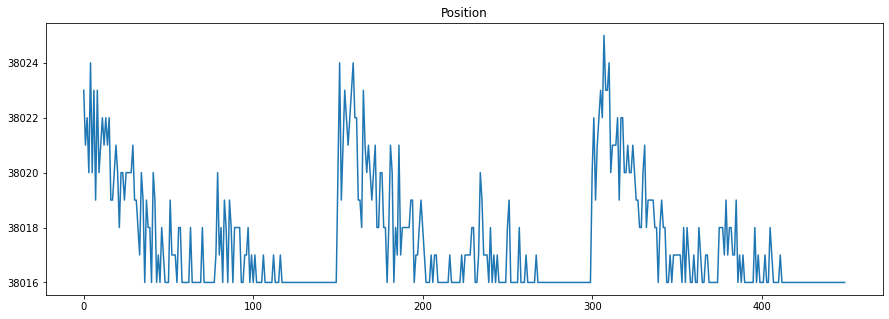

In [178]:
#data_Position = data_Position.set_index('date_tm')
data_Position[' Sample'].plot.line(figsize=(15, 5), color=color_pal[0], title='Position')

<AxesSubplot: title={'center': 'Voltage'}>

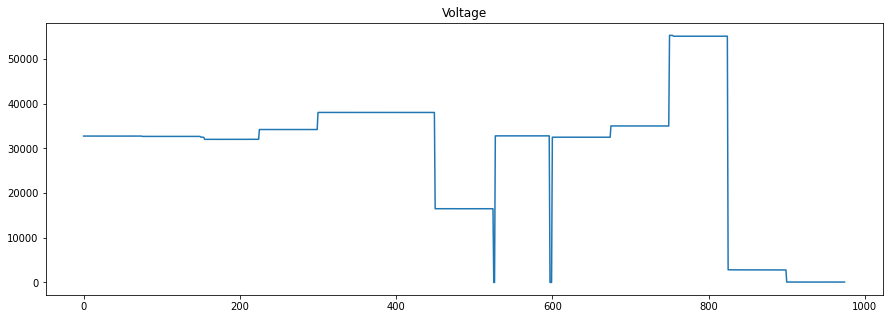

In [187]:
data_Voltage[' Sample'].plot.line(figsize=(15, 5), color=color_pal[0], title='Voltage')

<AxesSubplot: title={'center': 'Voltage'}, ylabel='Density'>

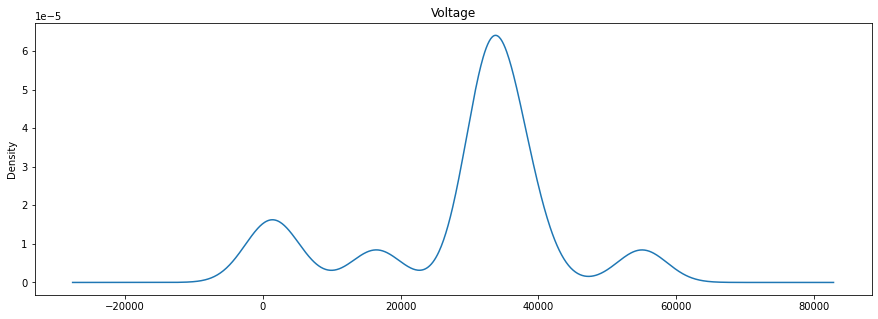

In [192]:
data_Voltage[' Sample'].plot.density(figsize=(15, 5), color=color_pal[0], title='Voltage')

<AxesSubplot: title={'center': 'TEMP'}>

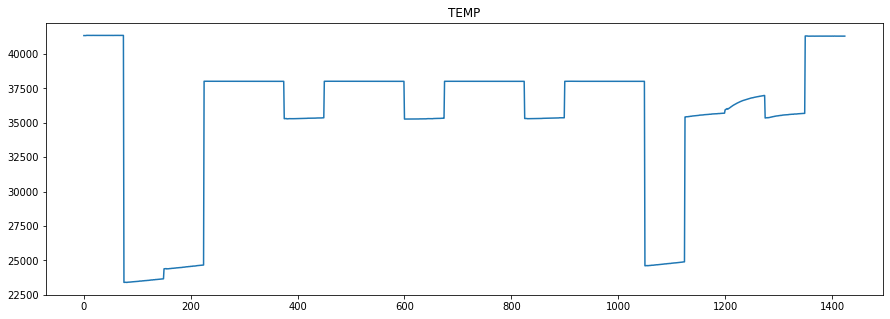

In [188]:
data_TEMP[' Sample'].plot.line(figsize=(15, 5), color=color_pal[0], title='TEMP')

<AxesSubplot: title={'center': 'TEMP'}, ylabel='Density'>

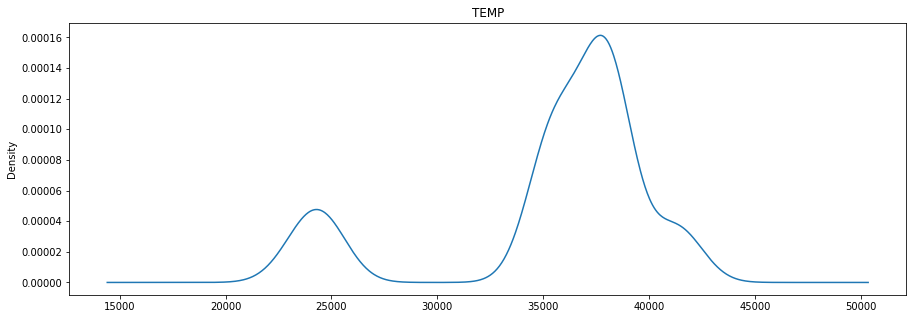

In [193]:
data_TEMP[' Sample'].plot.density(figsize=(15, 5), color=color_pal[0], title='TEMP')

<AxesSubplot: title={'center': 'Current'}>

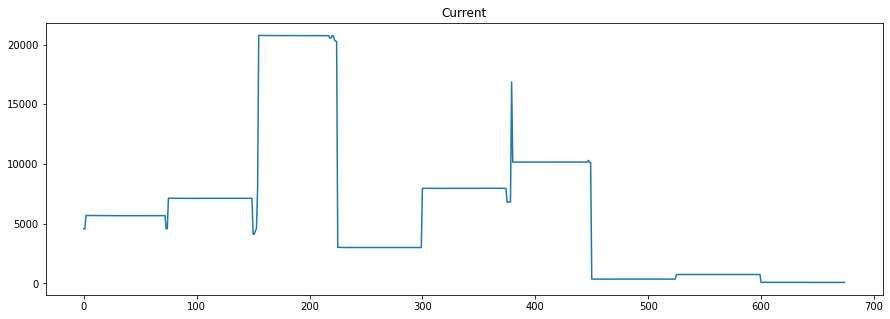

In [191]:
data_Current[' Sample'].plot.line(figsize=(15, 5), color=color_pal[0], title='Current')

<AxesSubplot: title={'center': 'Current'}, ylabel='Density'>

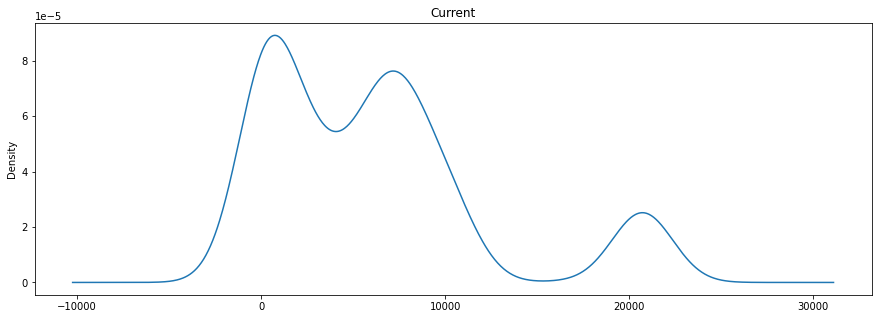

In [194]:
data_Current[' Sample'].plot.density(figsize=(15, 5), color=color_pal[0], title='Current')

Steps to be followed:

1. Data Acquisition: Gather data from all supplied CSV example files.
2. Data Preprocessing: Clean and preprocess the data, handling missing values, outliers, and inconsistencies.
3. Data Integration: Merge the preprocessed data into a unified dataset.
4. Feature Engineering: Extract relevant features from the data, such as time series characteristics, frequency domain analysis, and statistical measures.
5. Data Labeling: Assign labels to the data, categorizing them as seismic or non-seismic events.
6. Negative Sample Generation: Collect data that does not represent seismic events and incorporate it into the dataset, labeling these as negative samples.
7. Model Selection: Choose a suitable machine learning algorithm (e.g., random forest, support vector machine) based on the dataset's characteristics.
8. Model Training: Train the selected model on the labeled dataset.
9. Hyperparameter Tuning: Optimize the model's hyperparameters to enhance performance.
10. Model Evaluation: Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score) on a held-out test set.

---